# 원, 사각형, 삼각형 구분하기
- 어려운 테스트 문제를 데이터 부풀리기를 이용하여 데이터를 많이 생성
- 기존 CNN 모델 사용


In [1]:
from google.colab import files
up = files.upload()

Saving hard_handwriting_shape.zip to hard_handwriting_shape.zip


In [2]:
!unzip hard_handwriting_shape.zip -d hard_handwriting > /dev/null

- 데이터셋 생성하기

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=15,          # randomly rotate images in the range 15 degree
    width_shift_range=0.1,      # randomly shift images horizontally 
    height_shift_range=0.1,     # randomly shift images vertically
    shear_range=0.5,            # 도형의 기울기
    zoom_range=[0.8,1.5],       # 0.8~1.5 배 크기로 임의로 확대/축소
    horizontal_flip=True,       # randomly flip images
    vertical_flip=False,        # randomly flip images
    fill_mode='nearest'         # set mode for filling points outside the input boundaries
)

In [4]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img('hard_handwriting/train/triangle/triangle001.png')
x = img_to_array(img)
x.shape

(24, 24, 3)

In [5]:
#x.reshape(1, 24, 24, 3)
x = x.reshape((1,) + x.shape)
x.shape

(1, 24, 24, 3)

- 데이터 부풀리기를 통하여 만들어지는 새로운 도형 이미지

In [6]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

In [7]:
import os
if not os.path.exists('preview'):
    os.mkdir('preview')

In [8]:
count = 0
for _ in train_datagen.flow(x, batch_size=1, save_to_dir='./preview', save_prefix='pre'):
    count += 1
    if count >= 30:
        break

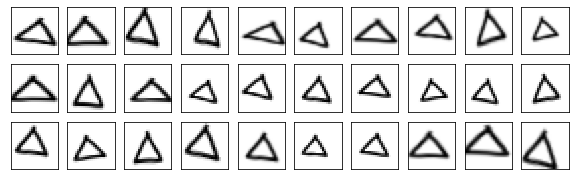

In [9]:
plt.figure(figsize=(10,3))
for i, fname in enumerate(glob('preview/*.png')):
    img = Image.open(fname)
    plt.subplot(3, 10, i+1)
    plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.show()

- data generator

In [10]:
train_data_generator = train_datagen.flow_from_directory(
    'hard_handwriting/train', target_size=(24,24),
    batch_size=3, class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    'hard_handwriting/test', target_size=(24,24),
    batch_size=3, class_mode='categorical'
)

Found 15 images belonging to 3 classes.


- 모델 정의/설정/학습

In [12]:
import numpy as np
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [14]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [15]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [16]:
model.fit(
    train_data_generator, steps_per_epoch=15, epochs=300,
    validation_data=test_data_generator, validation_steps=5
)

Epoch 1/300
15/15 [==============================] - 2s 49ms/step - loss: 1.1368 - accuracy: 0.4444 - val_loss: 1.0789 - val_accuracy: 0.4000
Epoch 2/300
15/15 [==============================] - 0s 31ms/step - loss: 0.7868 - accuracy: 0.7111 - val_loss: 1.2228 - val_accuracy: 0.4000
Epoch 3/300
15/15 [==============================] - 1s 46ms/step - loss: 0.6612 - accuracy: 0.5778 - val_loss: 1.0910 - val_accuracy: 0.5333
Epoch 4/300
15/15 [==============================] - 0s 23ms/step - loss: 0.5112 - accuracy: 0.7778 - val_loss: 1.2458 - val_accuracy: 0.4000
Epoch 5/300
15/15 [==============================] - 0s 25ms/step - loss: 0.3171 - accuracy: 0.8667 - val_loss: 1.5862 - val_accuracy: 0.5333
Epoch 6/300
15/15 [==============================] - 0s 26ms/step - loss: 0.2777 - accuracy: 0.8667 - val_loss: 1.5589 - val_accuracy: 0.5333
Epoch 7/300
15/15 [==============================] - 0s 31ms/step - loss: 0.2231 - accuracy: 0.9111 - val_loss: 2.2819 - val_accuracy: 0.5333
Epoch 

In [17]:
model.evaluate(test_data_generator)

5/5 [==============================] - 0s 7ms/step - loss: 2.2406 - accuracy: 0.6000


[2.240583896636963, 0.6000000238418579]